# Loading Libraries and Data
First, let us load the necessary libraries into the Jupyter Notebook, and load in the data we need from the players.csv and sessions.csv files.

In [1]:
library(tidyverse)
players_info <- read_csv("players.csv")
sessions_info <- read_csv("sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

# 1) Data Description

In [2]:
summary(players_info)
players_info |>
count(experience)
players_info |>
count(gender)
# players_info |>
# filter(played_hours == 0)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


Looking at the summary of the players.csv file, there are 196 observations and 7 variables, showing data for each player. Below is information for each of the variables.
- experience: character type, describing the experience level of each player, which can be either 'Beginner' (35 players), 'Regular' (36 players), 'Amateur' (63 players), 'Veteran' (48 players) or 'Pro' (14 players).
- subscribe: logical type, describing if the player is subscribed (True, 144 players) or not (False, 52 players).
- hashedEmail: character type, the email of the player, which is masked to protect their identity.
- played_hours: double type, the amount of hours played by a given player, ranging from 0 to 223.10 hours, with a mean of 5.8 hours.
- name: character type, the name of each player.
- gender: character type, the gender of each player, either 'Male' (124 players), 'Female' (37 players), 'Non-binary' (15 players), 'Prefer not to say' (11 players), 'Two-Spirited' (6 players), 'Agender' (2 players) or 'Other (1 player).
- age: double type, the age of the player, ranging from 9 to 58 years old, with a median age of 19 years old.

The biggest issue I saw is that there are 85 players who have played 0 hours, which may affect future data analyses.

In [3]:
summary(sessions_info)
head(sessions_info)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Looking at the summary of the players.csv file, there are 1535 observations and 5 variables, showing data about individual play sessions from each player. Below is information for each of the variables.
- hashedEmail: character type, the email of the player, which is masked to protect their identity.
- start_time: character type, the start time of each session
- end_time: character type, the end time of each session
- original_start_time: double type, the original start time of each session
- original_end_time: double type, the original end time of each session

The biggest issue I saw in this file was that both the original_start_time and original_end_time columns have numbers that are significantly large, and may be difficult to visualize.

# 2) Questions

Can the age of a player and the hours they played predict the level of experience they have?

The data will help me address this as I am given a wide range of ages and five possible classifications for level of experince. To wrangle the data, I will create a new dataframe that only contain the 'experience', 'played_hours' and 'Age' columns.

# 3) Exploratory Data Analysis and Visualization

### I) Loading Datasets into R

In [4]:
players_info <- read_csv("players.csv")
sessions_info <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### II) Tidying the Data

In [5]:
tidy_players_info <- players_info
tidy_players_info

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [6]:
# tidy_sessions_info <- head(sessions_info) |>
#     mutate(original_start_time = as_datetime(original_start_time/1000)) |>
#     mutate(original_end_time = as_datetime(original_end_time/1000))
# tidy_sessions_info

### III) Mean Values of players.csv Datastet

In [7]:
mean_of_quantitative_variables <- tidy_players_info |>
    select(played_hours, Age) |>
    map_df(mean)
mean_of_quantitative_variables

played_hours,Age
<dbl>,<dbl>
5.845918,NA


### IV) Visualizations

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


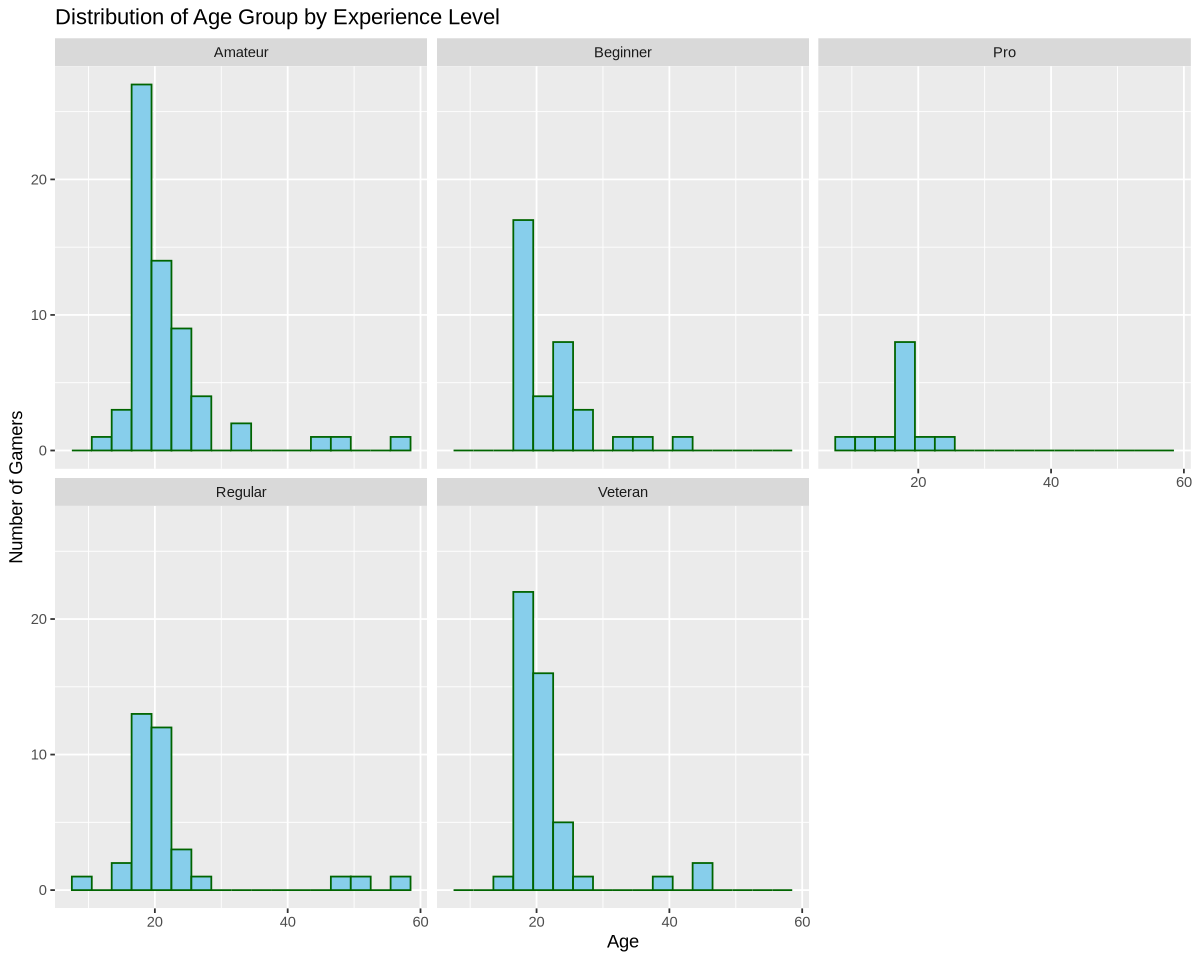

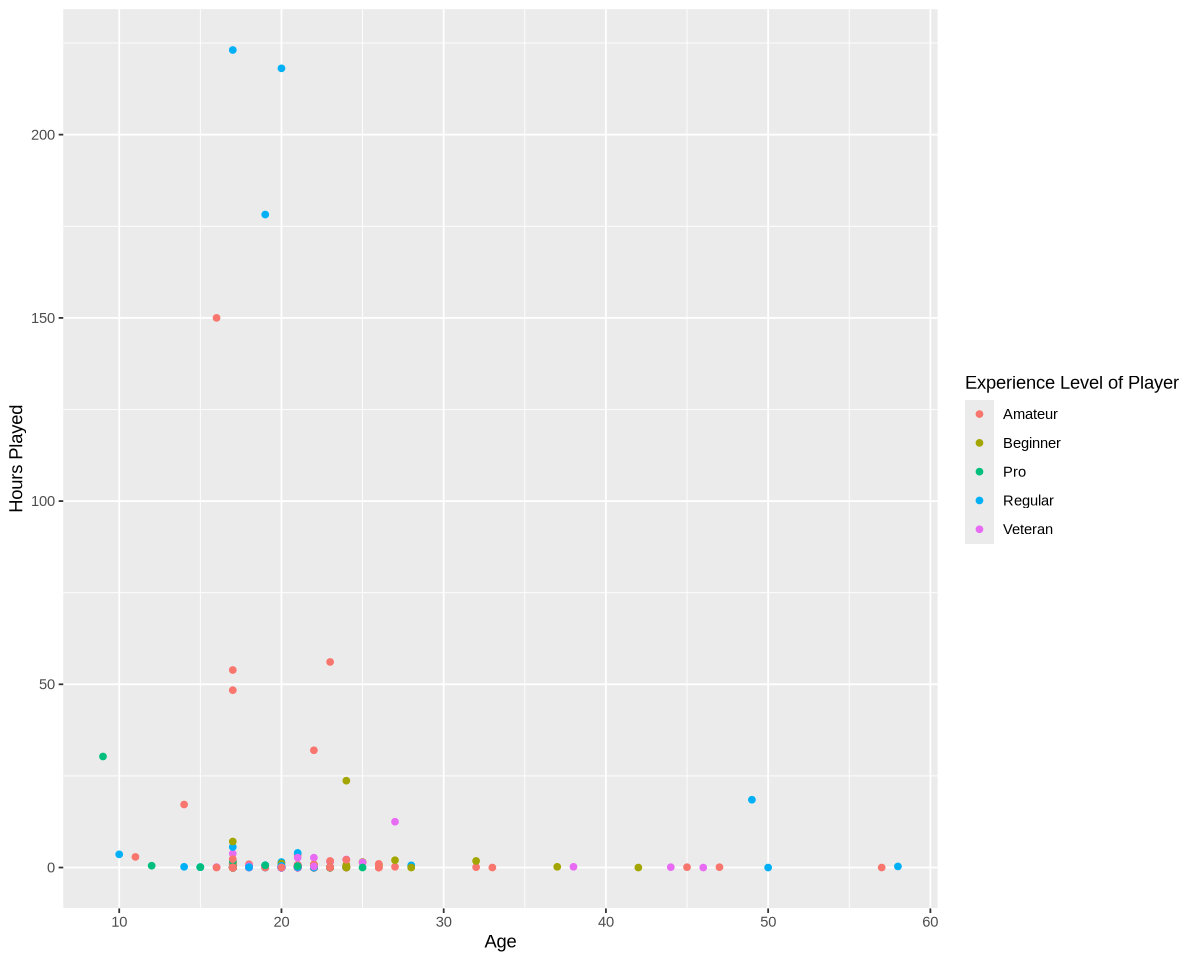

In [9]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Plotting distribution of Age
age_distribution <- tidy_players_info |>
  ggplot(aes(x = Age)) +
  geom_histogram(fill = "skyblue", color = "darkgreen", binwidth = 3) +
  facet_wrap(~experience) +
  labs(x = "Age", y = "Number of Gamers", title = "Distribution of Age Group by Experience Level") 
age_distribution

# Plotting Age vs played_hours, points colored by experience
age_vs_played_hours_plot <- tidy_players_info |>
  ggplot(aes(x = Age, y = played_hours, color = experience)) +
  geom_point() +
  labs(x = 'Age', y = "Hours Played", color = "Experience Level of Player")
age_vs_played_hours_plot

#### Observations of the Plots
In the histogram, it shows that regardless of experience level, most players are around 20 years old, which will make it much more difficult to predict experience level based on age.

In the scatterplot, it shows that there is no correlation between the age of they player and the hours they played, compared to theur

# 4) Methods and Plan

The method I will use to address my question of interest is K-Nearest Neighbours. This method is appropriate as I am trying to classify a player into one of 5 categories based on age. Some assumptions that are required are that there is a correlation between the age of the player and what experience level they have. Potential limitations or weaknesses of the model are that it does rely on there being a correlation between age and experience level, and that if the dataset 

# 5) GitHub Repository Link

https://github.com/saurav-s25/DSCI-100-Project-Individual.git